# Project 3:

# Predicting price of houses on basis of their area using Linear Regression:
######
| **Prepared by:** | Rayyan Ahmed.
|----------|----------------------------------------------------|
| **Date:** | 30th May, 2024

###
## Preparing DataFrame:
###

In [1]:
import pandas as pd

a = pd.DataFrame({'Area': [2600, 3000, 3200, 3600, 4000, 5500, 6500, 7500, 8500, 9500, 10500, 11500, 12500,13500, 14500, 15500, 16500, 17500, 18500, 20000],'Price': [550000, 565000, 610000, 680000, 725000, 850000, 950000, 1050000, 1150000, 1250000, 1350000, 1450000, 1550000,1650000, 1750000, 1850000, 1950000, 2050000, 2150000, 2250000]})
a

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000
5,5500,850000
6,6500,950000
7,7500,1050000
8,8500,1150000
9,9500,1250000


###
## Plotting DataFrame:
###

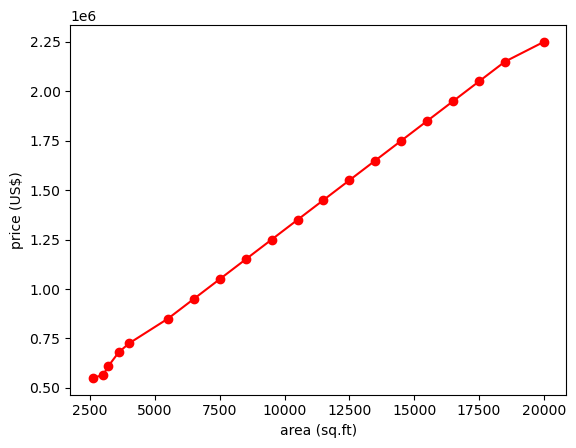

In [2]:
import matplotlib.pyplot as plt

plt.plot(a.Area, a.Price, color = 'red', marker = 'o')
plt.xlabel('area (sq.ft)')
plt.ylabel('price (US$)')
plt.show()

###
## Seperating Independent Values(x) and Dependent Values(y):
###

In [27]:
x = a[['Area']]
y = a['Price']


###
## train_test_split:
###

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

###
## Getting Shapes:
###

In [29]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16, 1), (4, 1), (16,), (4,))

###
## Training Algorithm:
###

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

###
## Predicting Values of unseen data (x_test):
###

In [34]:
model.predict(x_test)

array([2148637.4025974 ,  603760.45454545, 2298141.62337662,
       1151942.5974026 ])

###
## DataFrame of actual unseen values (y_test) and predicted unseen values (model.predict(x_test)):
###

In [36]:
pd.DataFrame({'Actual Price (y_test)': y_test, 'Predicted Price (model.predict(x_test))': model.predict(x_test)})

,Actual Price (y_test),Predicted Price (model.predict(x_test))
18,2150000,2.148637e+06
1,565000,6.037605e+05
19,2250000,2.298142e+06
8,1150000,1.151943e+06


###
## coef_ & intercept_ :
###

In [37]:
model.coef_, model.intercept_

(array([99.66948052]), 304752.01298701356)

###
## Predicting Program:
###

In [38]:
ask = float(input('For how much area you want to predict the price: '))
prediction = model.predict([[ask]])
prediction_ = float(prediction)
print(f'\nDetails:\nArea: {ask}')
print(f'Predicted Price according to {ask} area: {prediction_:.3f}')

For how much area you want to predict the price: 8500

Details:
Area: 8500.0
Predicted Price according to 8500.0 area: 1151942.597


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

print(f'R2:{r2_score(y_test, model.predict(x_test))}')
print(f'Mean Absolute Error(MAE): {mean_absolute_error(y_test, model.predict(x_test))}')
print(f'Mean Squared Error(MSE): {mean_squared_error(y_test, model.predict(x_test))}')
print(f'Root Mean Squared Error: {np.sqrt(mean_absolute_error(y_test, model.predict(x_test)))}')

R2:0.9980663248898864
Mean Absolute Error(MAE): 22551.818181818206
Mean Squared Error(MSE): 956404773.5642542
Root Mean Squared Error: 150.17262793804403


###
## Standardization :
###

###
## Importing StandardScalar:
###

In [40]:
from sklearn.preprocessing import StandardScaler

###
## Standardizing orignal DataFrame (a):
###

In [2]:
a1 = a.copy()
scalar = StandardScaler()
a1_scaled_ = scalar.fit_transform(a1)
a1_scaled_

a1_scaled = pd.DataFrame(a1_scaled_, columns = ['Area','Price'])
a1_scaled


NameError: name 'a' is not defined

###
## Seperating Independent Values(x) and Dependent Values(y):
###

In [44]:
x1 = a1_scaled[['Area']]
y1 = a1_scaled['Price']


###
## train_test_split:
###

In [45]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

###
## Training Algorithm:
###

In [46]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x1_train, y1_train)

LinearRegression()

###
## Predicting values of unseen data (x1_test):
###

In [47]:
model1.predict(x1_test)

array([ 1.51166707, -1.30322484,  1.78407597, -0.30439222])

###
## Actual test values (y1_test) and Predicted test values (model1.predict(x1_test)):
###

In [48]:
pd.DataFrame({'Actual Price (y_test)': y1_test, 'Predicted Price (model1.predict(x1_test))': model1.predict(x1_test)})

,Actual Price (y_test),Predicted Price (model1.predict(x1_test))
18,1.514150,1.511667
1,-1.373850,-1.303225
19,1.696358,1.784076
8,-0.307932,-0.304392


###
## Evaluating Model Performance :
###

In [50]:
print(f'R2:{r2_score(y1_test, model1.predict(x1_test))}')
print(f'Mean Absolute Error(MAE): {mean_absolute_error(y1_test, model1.predict(x1_test))}')
print(f'Mean Squared Error(MSE): {mean_squared_error(y1_test, model1.predict(x1_test))}')
print(f'Root Mean Squared Error: {np.sqrt(mean_absolute_error(y1_test, model1.predict(x1_test)))}')

R2:0.9980663248898864
Mean Absolute Error(MAE): 0.04109125368244074
Mean Squared Error(MSE): 0.0031752461303599187
Root Mean Squared Error: 0.20270977697792658


R-squared: This is a statistical measure of how well the regression line fits the actual data. An R-squared of 0.998 indicates a very strong correlation between your predicted prices and the actual prices. In other words, your model is effectively capturing the underlying relationship in the data.

Mean Absolute Error (MAE): This is the average difference between the predicted prices and the actual prices. A lower MAE is better, and a value of 22551.82 means that the average difference between your predictions and the actual prices is around $22,551.82.

Mean Squared Error (MSE): This is the average squared difference between the predicted prices and the actual prices. Squaring the errors gives more weight to larger errors. A lower MSE is better, and a value of 956404773.56 means that the average squared difference between your predictions and the actual prices is relatively low.

Root Mean Squared Error (RMSE): This is the square root of the MSE, and it is another way to measure the difference between the predicted prices and the actual prices. A lower RMSE is better, and a value of 150.17 indicates that the average difference between your predictions and the actual prices is on a similar scale to the data itself.

###
## Predicting Program:
###

In [52]:
ask1 = float(input('For how much area you want to predict the price: '))
prediction1 = model1.predict([[ask1]])
prediction1_ = float(prediction1)

stand_area = ( ask1 * 5520.380422) + 10220.0
stand_price = ( prediction1_ * 548822.8311577425) + 1319000.0

print(f'\nDetails:\nArea in sqr.foot: {ask1} ({stand_area:.3f})')
print(f'Predicted Price according to {ask1} ({stand_area:.3f}) sqr.foot area: {prediction1_:.3f} ({stand_price:.3f})')

For how much area you want to predict the price: -1.199193	

Details:
Area in sqr.foot: -1.199193 (3599.998)
Predicted Price according to -1.199193 (3599.998) sqr.foot area: -1.194 (663561.987)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##
## Comparision of test dataset:
##

In [63]:
y1_org = ( y1_test * 548822.8311577425) + 1319000.0

pd.DataFrame({'Actual Price': y_test, 'Predicted Price': model.predict(x_test).astype(int), 'Actual Price (standardized)': y1_test, 'Predicted Price (standardized)': model1.predict(x1_test)})


,Actual Price,Predicted Price,Actual Price (standardized),Predicted Price (standardized)
18,2150000,2148637,1.514150,1.511667
1,565000,603760,-1.373850,-1.303225
19,2250000,2298141,1.696358,1.784076
8,1150000,1151942,-0.307932,-0.304392


###
## Comparision of train dataset:
###

In [64]:
pd.DataFrame({'Actual Price': y_train, 'Predicted Price': model.predict(x_train).astype(int), 'Actual Price (standardized)': y1_train, 'Predicted Price (standardized)': model1.predict(x1_train)})


,Actual Price,Predicted Price,Actual Price (standardized),Predicted Price (standardized)
10,1350000,1351281,0.056485,0.058820
17,2050000,2048967,1.331942,1.330061
6,950000,952603,-0.672348,-0.667604
13,1650000,1650289,0.603109,0.603637
4,725000,703429,-1.082316,-1.121619
2,610000,623694,-1.291856,-1.266904
5,850000,852934,-0.854556,-0.849210
14,1750000,1749959,0.785317,0.785243
9,1250000,1251612,-0.125724,-0.122786
7,1050000,1052273,-0.490140,-0.485998


###
## Comparision of whole dataset:
###

In [66]:
pd.DataFrame({'Actual Price': y, 'Predicted Price': model.predict(x).astype(int), 'Actual Price (standardized)': y1, 'Predicted Price (standardized)': model1.predict(x1)})


,Actual Price,Predicted Price,Actual Price (standardized),Predicted Price (standardized)
0,550000,563892,-1.401181,-1.375867
1,565000,603760,-1.373850,-1.303225
2,610000,623694,-1.291856,-1.266904
3,680000,663562,-1.164310,-1.194261
4,725000,703429,-1.082316,-1.121619
5,850000,852934,-0.854556,-0.849210
6,950000,952603,-0.672348,-0.667604
7,1050000,1052273,-0.490140,-0.485998
8,1150000,1151942,-0.307932,-0.304392
9,1250000,1251612,-0.125724,-0.122786
